Let's train a PET classifier

In [ ]:
from fastai.vision.all import *
import timm

path = untar_data(URLs.PETS)




In [ ]:
dls = ImageDataLoaders.from_name_re(
    path, get_image_files(path/'images'),
    pat='(.+)_\d+.jpg',
    item_tfms=Resize(230),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)


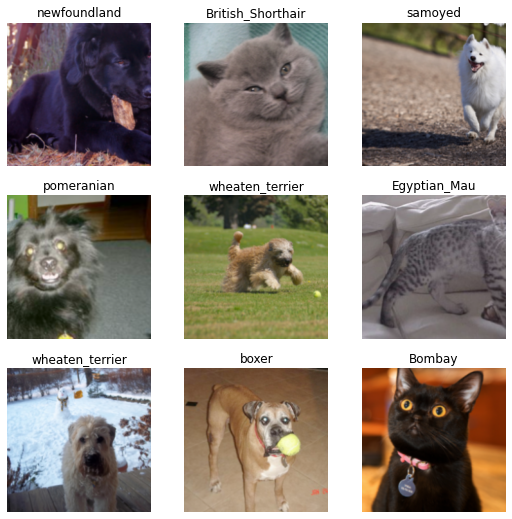

In [ ]:
dls.show_batch()

In [ ]:

learn = vision_learner(dls, models.resnet18, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')


epoch,train_loss,valid_loss,accuracy,time
0,1.670269,0.424874,0.861299,06:12


epoch,train_loss,valid_loss,accuracy,time
0,0.540427,0.348663,0.888363,07:49


In [ ]:
learn.export()

In [ ]:
timm.list_models(filter="convnext*")

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [ ]:
learn = vision_learner(dls, "convnext_tiny_in22k", metrics=accuracy)
learn.fine_tune(1)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /Users/chris/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,accuracy,time


Let's load the exported model and run in gradio

In [ ]:
learn.export("convnext_tiny.pkl")

Deployment

In [ ]:
from fastai.vision.all import *
learn = load_learner('export.pkl')

In [ ]:
m = learn.model

In [ ]:
m[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
# !pip install gradio

In [ ]:
import gradio as gr

gradio_interface = gr.Interface(
    fn=predict,
    inputs=gr.inputs.Image(shape=(512, 512)),
    outputs=gr.outputs.Label(num_top_classes=3),
    examples=["cat.jpeg", "dog.jpeg", "catdog.jpeg"]
)
gradio_interface.launch()


/opt/homebrew/Caskroom/miniconda/base/envs/nuefast/lib/python3.8/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nuefast/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/homebrew/Caskroom/miniconda/base/envs/nuefast/lib/python3.8/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nuefast/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App>, 'http://127.0.0.1:7860/', None)